In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [124]:
# sampling rate = 250
jordan_eeg = pd.read_csv('/Users/seemarida/Desktop/COGS189_analysis/cogs_189_project/data/misc/eeg_-Jordan_real_trial_run-1.csv')
jordan_eeg

,Timestamp,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,EEG_8
0,1.741819e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.741819e+09,-4700.437748,2127.729610,-19790.681576,-35140.205638,-25039.698188,-7982.500849,-39512.922110,-187500.022352
2,1.741819e+09,-4815.817453,2009.220661,-19910.017539,-35257.798166,-25159.212966,-8099.020493,-39631.922797,-187500.022352
3,1.741819e+09,-4752.584368,2066.955217,-19850.718361,-35188.060723,-25101.254892,-8046.560949,-39569.896706,-187500.022352
4,1.741819e+09,-4616.283431,2202.585602,-19707.443679,-35045.054262,-24960.885937,-7907.153119,-39426.711431,-187500.022352
...,...,...,...,...,...,...,...,...,...
387056,1.741820e+09,-13028.138939,-5743.660717,-14381.738231,-33234.786479,-28035.502498,-8232.326297,-35073.038646,-187500.022352
387057,1.741820e+09,-13012.448014,-5744.040697,-14348.724705,-33191.044115,-28010.580303,-8224.324372,-35039.823954,-187500.022352
387058,1.741820e+09,-13063.767620,-5793.594515,-14370.808228,-33216.838028,-28044.040864,-8258.388431,-35063.382693,-187500.022352
387059,1.741820e+09,-13133.013324,-5862.326129,-14432.879023,-33280.629907,-28096.500408,-8320.392170,-35125.475839,-187500.022352


In [125]:
# drop unused channels (channel 8)
jordan_eeg.drop('EEG_8', axis=1, inplace=True)
jordan_eeg

,Timestamp,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7
0,1.741819e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.741819e+09,-4700.437748,2127.729610,-19790.681576,-35140.205638,-25039.698188,-7982.500849,-39512.922110
2,1.741819e+09,-4815.817453,2009.220661,-19910.017539,-35257.798166,-25159.212966,-8099.020493,-39631.922797
3,1.741819e+09,-4752.584368,2066.955217,-19850.718361,-35188.060723,-25101.254892,-8046.560949,-39569.896706
4,1.741819e+09,-4616.283431,2202.585602,-19707.443679,-35045.054262,-24960.885937,-7907.153119,-39426.711431
...,...,...,...,...,...,...,...,...
387056,1.741820e+09,-13028.138939,-5743.660717,-14381.738231,-33234.786479,-28035.502498,-8232.326297,-35073.038646
387057,1.741820e+09,-13012.448014,-5744.040697,-14348.724705,-33191.044115,-28010.580303,-8224.324372,-35039.823954
387058,1.741820e+09,-13063.767620,-5793.594515,-14370.808228,-33216.838028,-28044.040864,-8258.388431,-35063.382693
387059,1.741820e+09,-13133.013324,-5862.326129,-14432.879023,-33280.629907,-28096.500408,-8320.392170,-35125.475839


In [126]:
# milestones
first_timestamp = jordan_eeg['Timestamp'].iloc[0]
first_timestamp

1741818677.9659934

In [127]:
jordan_labels = pd.read_csv('/Users/seemarida/Desktop/COGS189_analysis/cogs_189_project/data/misc/labels_subject-Jordan_real_trial_run-1.csv')
jordan_labels

,Timestamp,Label
0,1.741819e+09,Lecture Started
1,1.741819e+09,Lost Focus
2,1.741819e+09,Focused Again
3,1.741819e+09,Lost Focus
4,1.741819e+09,Focused Again
5,1.741819e+09,Lost Focus
6,1.741819e+09,Focused Again
7,1.741819e+09,Lecture Started
8,1.741819e+09,Lecture Paused
9,1.741820e+09,Lecture Started


In [128]:
jordan_eeg['Time'] = jordan_eeg['Timestamp'] - first_timestamp
#jordan_labels['Time'] = jordan_labels['Timestamp'] - first_timestamp

In [129]:
# remove accidental Lecture Started and Paused markers pressed

lecture_started = jordan_labels[jordan_labels['Label'] == 'Lecture Started'].index[0]
lecture_paused = jordan_labels[jordan_labels['Label'] == 'Lecture Paused'].index[-1]

jordan_labels.drop(jordan_labels[(jordan_labels['Label'] == 'Lecture Started') & (jordan_labels.index != lecture_started)].index, inplace=True)
jordan_labels.drop(jordan_labels[(jordan_labels['Label'] == 'Lecture Paused') & (jordan_labels.index != lecture_paused)].index, inplace=True)

In [130]:
#jordan_eeg[jordan_eeg['Time'] > 35.55].head(50)
# there's a time gap

In [131]:
# see if some channels might drop them DROP 8!
# line plot each agaisnt timestamp..


In [132]:
# merge labels with eeg data to create event markers
eeg_with_labels = pd.merge(jordan_eeg, jordan_labels, on='Timestamp', how='outer')
eeg_with_labels.head()
eeg_with_labels['Label'].notna().sum()
## this might be wrong because merging labels w eeg data is merging with more precisison , float, comaped to labels dataset..
# use a fuzzy merge based on nearest timestamp, match each event label (like "Lost Focus") to the closest EEG timestamp
#since the label timestamps are not perfectly aligned.

13

In [133]:
eeg_with_labels

,Timestamp,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,Time,Label
0,1.741819e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,1.741819e+09,-4700.437748,2127.729610,-19790.681576,-35140.205638,-25039.698188,-7982.500849,-39512.922110,0.483536,NaN
2,1.741819e+09,-4815.817453,2009.220661,-19910.017539,-35257.798166,-25159.212966,-8099.020493,-39631.922797,0.483602,NaN
3,1.741819e+09,-4752.584368,2066.955217,-19850.718361,-35188.060723,-25101.254892,-8046.560949,-39569.896706,0.483647,NaN
4,1.741819e+09,-4616.283431,2202.585602,-19707.443679,-35045.054262,-24960.885937,-7907.153119,-39426.711431,0.483689,NaN
...,...,...,...,...,...,...,...,...,...,...
387069,1.741820e+09,-13028.138939,-5743.660717,-14381.738231,-33234.786479,-28035.502498,-8232.326297,-35073.038646,1546.020109,NaN
387070,1.741820e+09,-13012.448014,-5744.040697,-14348.724705,-33191.044115,-28010.580303,-8224.324372,-35039.823954,1546.020116,NaN
387071,1.741820e+09,-13063.767620,-5793.594515,-14370.808228,-33216.838028,-28044.040864,-8258.388431,-35063.382693,1546.020123,NaN
387072,1.741820e+09,-13133.013324,-5862.326129,-14432.879023,-33280.629907,-28096.500408,-8320.392170,-35125.475839,1546.020131,NaN


In [134]:
# Find the index of the first occurrence of 'Lecture Started'
start_index = eeg_with_labels[eeg_with_labels['Label'] == 'Lecture Started'].index.min()

# Find the index of the first occurrence of 'Lecture Paused'
end_index = eeg_with_labels[eeg_with_labels['Label'] == 'Lecture Paused'].index.min()

# Slice the DataFrame to include only rows between 'Lecture Started' and 'Lecture Paused'
eeg_trimmed = eeg_with_labels.loc[start_index+1:end_index-1]

eeg_trimmed['Label'].notna().sum()

11

In [135]:
# scaling the eeg signal

scaling_factor = 0.02235
columns = ['EEG_1', 'EEG_2', 'EEG_3', 'EEG_4', 'EEG_5', 'EEG_6', 'EEG_7']
scaled_eeg = eeg_trimmed.copy()
scaled_eeg[columns] = scaled_eeg[columns] * scaling_factor

In [136]:
scaled_eeg.head()

,Timestamp,EEG_1,EEG_2,EEG_3,EEG_4,EEG_5,EEG_6,EEG_7,Time,Label
963,1.741819e+09,-147.644898,4.954151,-443.739489,-785.031405,-556.989579,-201.662482,-883.628357,4.325314,NaN
964,1.741819e+09,-145.115619,7.337559,-441.206712,-782.355754,-554.508257,-199.151686,-881.070603,4.325401,NaN
965,1.741819e+09,-143.203797,9.322317,-439.109053,-780.307552,-552.432079,-196.938129,-878.957957,4.325451,NaN
966,1.741819e+09,-145.126609,7.444465,-440.962426,-782.249847,-554.214515,-198.873930,-880.808832,4.325459,NaN
967,1.741819e+09,-147.495030,5.036579,-443.379804,-784.712185,-556.570447,-201.380729,-883.242196,4.325467,NaN


In [137]:
# renaming the channels to correspond with actual electrodes used
rename_dict = {
    'EEG_1': 'Fp1',
    'EEG_2': 'Fp2',
    'EEG_3': 'F3',
    'EEG_4': 'F4',
    'EEG_5': 'F7',
    'EEG_6': 'F8',
    'EEG_7': 'Fz'
}
scaled_eeg.rename(columns=rename_dict, inplace=True)

In [138]:
scaled_eeg.columns

Index(['Timestamp', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'Time',
       'Label'],
      dtype='object')

In [139]:
scaled_eeg['Label'].notna().sum()

11

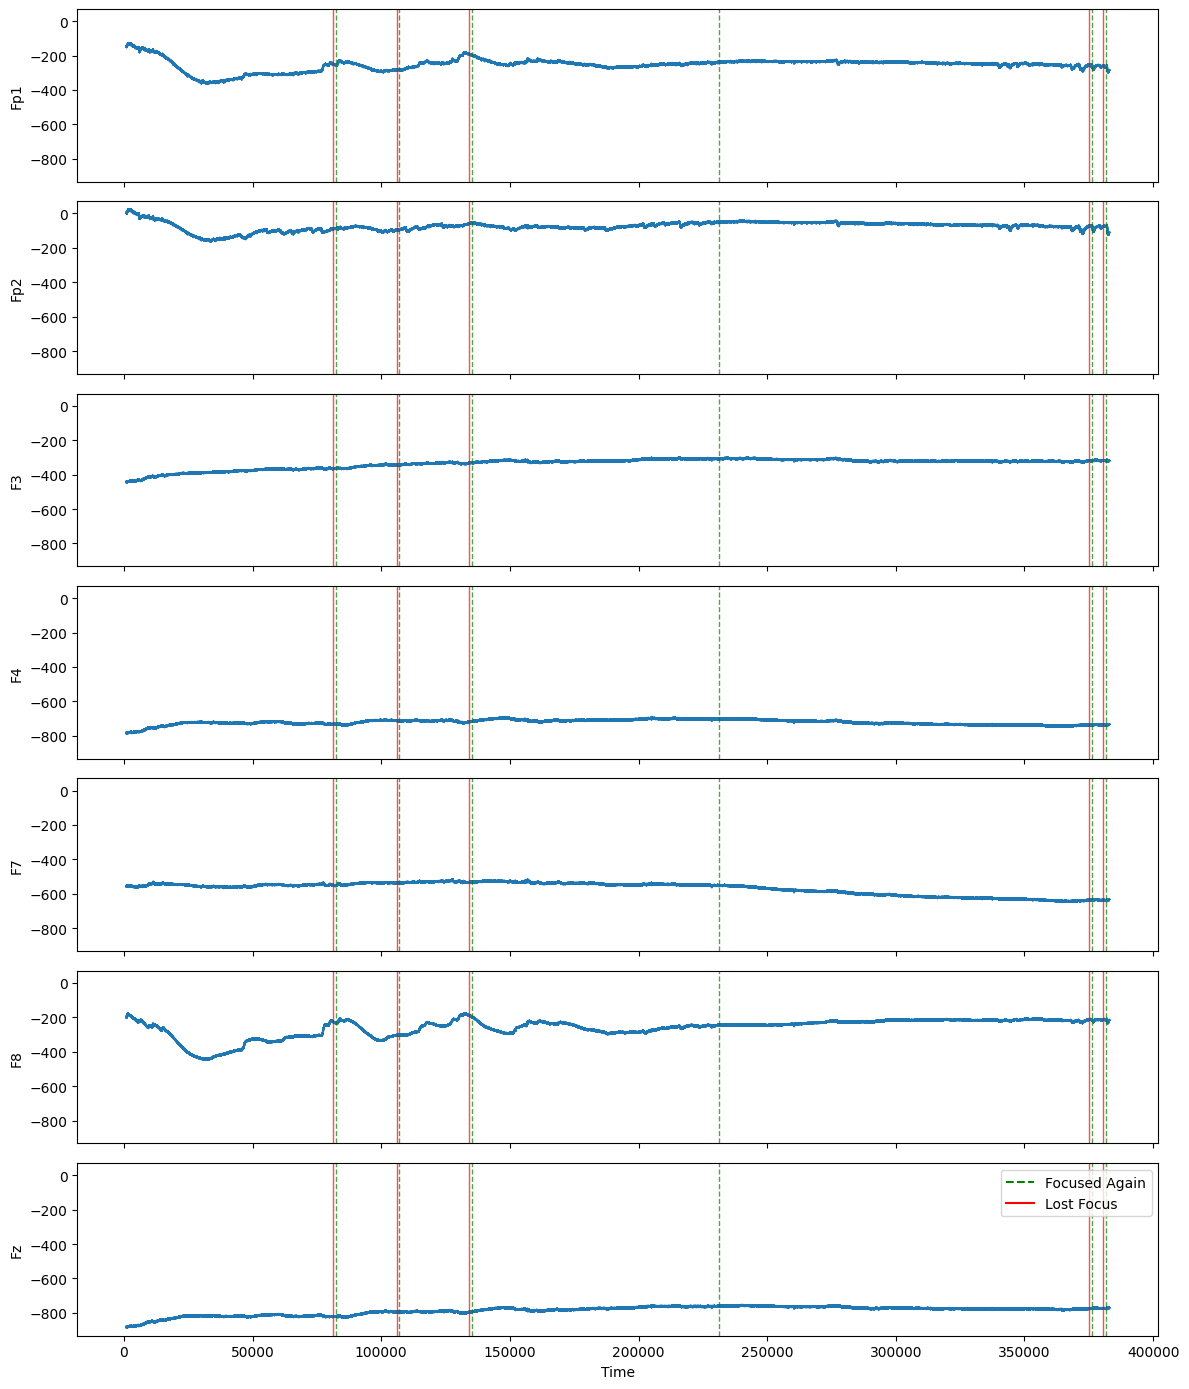

In [140]:
# excluding 'Time' and 'Label' cols
eeg_channels = [col for col in scaled_eeg.columns if col not in ['Time','Label','Timestamp']]

fig, axes = plt.subplots(nrows=len(eeg_channels), ncols=1, figsize=(12, 2 * len(eeg_channels)), sharex=True, sharey=True)

# markers
focused_marker = scaled_eeg.index[scaled_eeg['Label']=='Focused Again']
lost_focus_marker = scaled_eeg.index[scaled_eeg['Label']=='Lost Focus']

for i, channel in enumerate(eeg_channels):
    scaled_eeg[channel].plot(ax=axes[i], label=channel, legend=None)
    axes[i].set_ylabel(channel)

    # add lines to represent markers
    for event_time in focused_marker:
        axes[i].axvline(event_time, color='green', linestyle='dashed', alpha=0.7, linewidth=1)

    # Add vertical dashed lines at event indices
    for event_time in lost_focus_marker:
        axes[i].axvline(event_time, color='red', alpha=0.7, linewidth=1)

focused_handle = mlines.Line2D([], [], color='green', linestyle='dashed', label='Focused Again')
lost_focus_handle = mlines.Line2D([], [], color='red', label='Lost Focus')

axes[-1].legend(handles=[focused_handle, lost_focus_handle], loc='upper right')

# Set shared x-axis label
axes[-1].set_xlabel('Time')

# Adjust layout
#plt.xlim(50000,150000)
plt.tight_layout()
plt.show()

# seem to realize they lost focus after they zoned out for a while then press focused again right after
# look at whcih parts of brain contribute to channel??
# how do we know what's an artifact and what's real
# how to apply filtering
# how to extract - Fourier transform?
# steps?

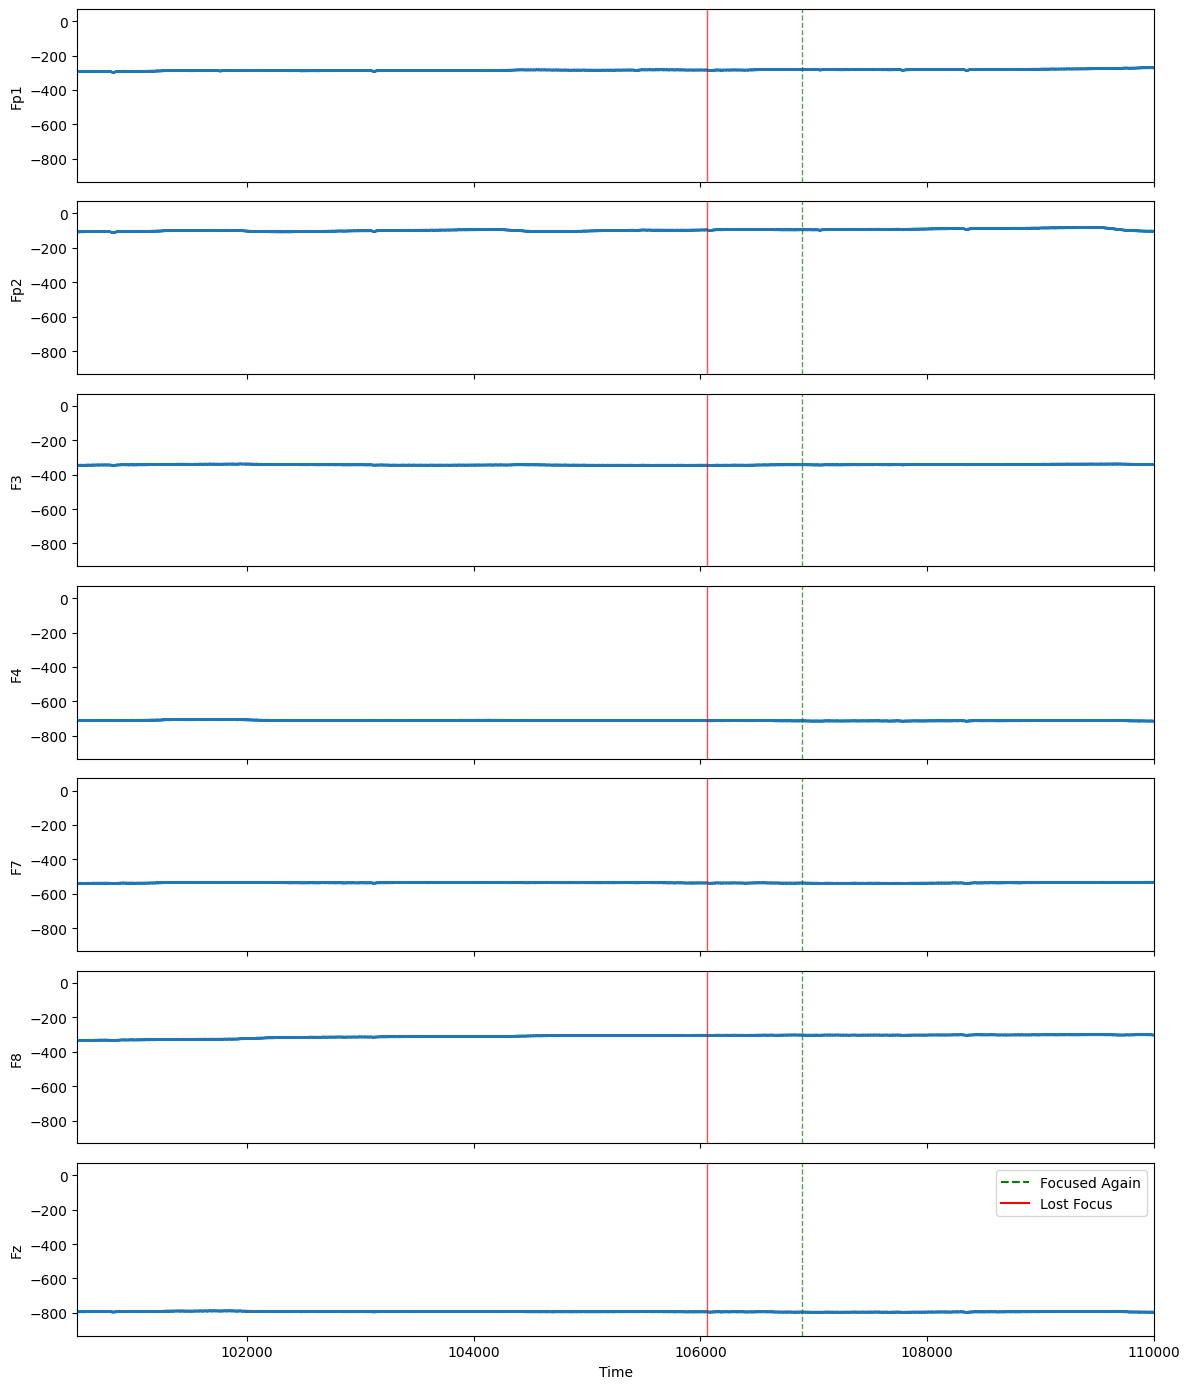

In [201]:
# excluding 'Time' and 'Label' cols
eeg_channels = [col for col in scaled_eeg.columns if col not in ['Time','Label','Timestamp']]

fig, axes = plt.subplots(nrows=len(eeg_channels), ncols=1, figsize=(12, 2 * len(eeg_channels)), sharex=True, sharey=True)

# markers
focused_marker = scaled_eeg.index[scaled_eeg['Label']=='Focused Again']
lost_focus_marker = scaled_eeg.index[scaled_eeg['Label']=='Lost Focus']

for i, channel in enumerate(eeg_channels):
    scaled_eeg[channel].plot(ax=axes[i], label=channel, legend=None)
    axes[i].set_ylabel(channel)

    # add lines to represent markers
    for event_time in focused_marker:
        axes[i].axvline(event_time, color='green', linestyle='dashed', alpha=0.7, linewidth=1)

    # Add vertical dashed lines at event indices
    for event_time in lost_focus_marker:
        axes[i].axvline(event_time, color='red', alpha=0.7, linewidth=1)

focused_handle = mlines.Line2D([], [], color='green', linestyle='dashed', label='Focused Again')
lost_focus_handle = mlines.Line2D([], [], color='red', label='Lost Focus')

axes[-1].legend(handles=[focused_handle, lost_focus_handle], loc='upper right')

# Set shared x-axis label
axes[-1].set_xlabel('Time')

# Adjust layout
plt.xlim(100500,110000)
plt.tight_layout()
plt.show()

# seem to realize they lost focus after they zoned out for a while then press focused again right after
# look at whcih parts of brain contribute to channel??
# how do we know what's an artifact and what's real
# how to apply filtering
# how to extract - Fourier transform?
# steps?

In [141]:
#def plot_channel(channel):
    #plt.plot(scaled_eeg_data['Time'], scaled_eeg_data[channel])
    #plt.xlabel('Time (s)')
    #plt.ylabel('Voltage (µV)')
    #plt.title(f"{channel}")
    #plt.show()

#def plot_all_channels():
    #plot_channel('EEG_1')
    #plot_channel('EEG_2')
    #plot_channel('EEG_3')
    #plot_channel('EEG_4')
    #plot_channel('EEG_5')
    #plot_channel('EEG_6')
    #plot_channel('EEG_7')
#plot_all_channels()

In [142]:
# crop data like before and after recording
# crop data from markers of lecture started then paud

# DATA CLEANING

In [143]:
# Step 1: Separate rows with labels (even if they have NaNs)
label_rows = scaled_eeg[scaled_eeg['Label'].notna()]

# Step 2: Drop NaNs from EEG signal rows (no labels)
clean_rows = scaled_eeg[scaled_eeg['Label'].isna()].dropna(subset=eeg_channels)

# Step 3: Combine cleaned data with labeled rows
scaled_eeg_clean = pd.concat([clean_rows, label_rows], axis=0).sort_index().reset_index(drop=True)

In [144]:
scaled_eeg_clean['Label'].notna().sum()

11

In [145]:
from scipy.signal import butter, filtfilt

# apply bandpass filter
def bandpass_filter(data, lowcut=0.1, highcut=50, fs=250, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency (half of sampling rate)
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

In [146]:
#run filter
filtered_eeg = scaled_eeg_clean.copy()

for ch in eeg_channels:
    # Get the valid indices (non-NaN) for this channel
    valid_idx = filtered_eeg[ch].notna()
    
    # Apply filter only to valid values
    filtered_values = bandpass_filter(filtered_eeg.loc[valid_idx, ch])
    
    # Assign back filtered values to the right positions
    filtered_eeg.loc[valid_idx, ch] = filtered_values

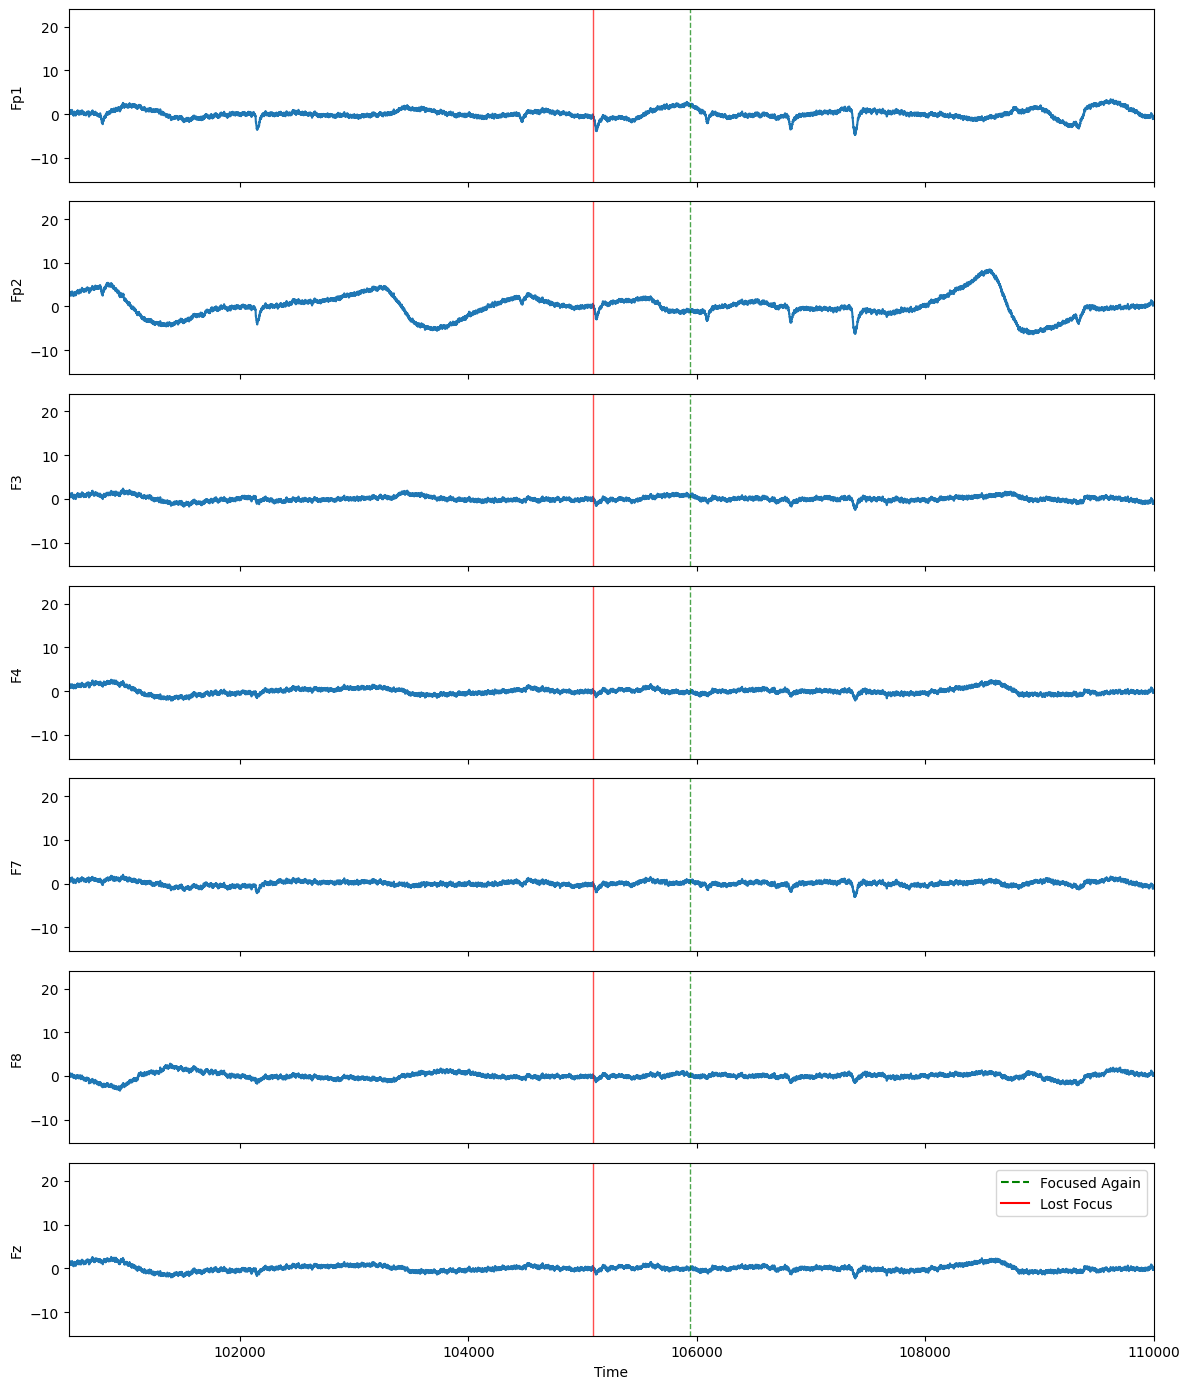

In [202]:
# excluding 'Time' and 'Label' cols
eeg_channels = [col for col in filtered_eeg.columns if col not in ['Time','Label','Timestamp']]

fig, axes = plt.subplots(nrows=len(eeg_channels), ncols=1, figsize=(12, 2 * len(eeg_channels)), sharex=True, sharey=True)

# markers
focused_marker = filtered_eeg.index[scaled_eeg['Label']=='Focused Again']
lost_focus_marker = filtered_eeg.index[scaled_eeg['Label']=='Lost Focus']

for i, channel in enumerate(eeg_channels):
    filtered_eeg[channel].plot(ax=axes[i], label=channel, legend=None)
    axes[i].set_ylabel(channel)

    # add lines to represent markers
    for event_time in focused_marker:
        axes[i].axvline(event_time, color='green', linestyle='dashed', alpha=0.7, linewidth=1)

    # Add vertical dashed lines at event indices
    for event_time in lost_focus_marker:
        axes[i].axvline(event_time, color='red', alpha=0.7, linewidth=1)

focused_handle = mlines.Line2D([], [], color='green', linestyle='dashed', label='Focused Again')
lost_focus_handle = mlines.Line2D([], [], color='red', label='Lost Focus')

axes[-1].legend(handles=[focused_handle, lost_focus_handle], loc='upper right')

# Set shared x-axis label
axes[-1].set_xlabel('Time')

# Adjust layout
plt.xlim(100500,110000)
plt.tight_layout()
plt.show()

In [148]:
filtered_eeg['Label'].notna().sum()

11

In [149]:
filtered_eeg

,Timestamp,Fp1,Fp2,F3,F4,F7,F8,Fz,Time,Label
0,1.741819e+09,-3.566786,-3.076963,0.700309,0.471635,1.235745,-6.000670,0.392326,4.325314,NaN
1,1.741819e+09,-1.080751,-0.650134,3.281537,3.119903,3.771083,-3.391106,2.994364,4.325401,NaN
2,1.741819e+09,-0.286760,0.116194,4.154139,3.998160,4.644012,-2.529816,3.877921,4.325451,NaN
3,1.741819e+09,-1.005819,-0.600458,3.480786,3.294750,4.014004,-3.259410,3.210321,4.325459,NaN
4,1.741819e+09,-1.676430,-1.255603,2.830936,2.649165,3.406019,-3.974153,2.573025,4.325467,NaN
...,...,...,...,...,...,...,...,...,...,...
382017,1.741820e+09,1.943515,2.312416,0.952728,1.112841,0.981769,1.554584,0.886689,1529.686495,NaN
382018,1.741820e+09,2.009714,2.330867,1.033363,1.199221,1.058274,1.604453,0.987127,1529.686503,NaN
382019,1.741820e+09,2.264318,2.551021,1.299085,1.462634,1.314538,1.821000,1.265821,1529.686511,NaN
382020,1.741820e+09,2.108230,2.384386,1.179199,1.310818,1.192893,1.650966,1.149549,1529.686518,NaN


## Epoching

In [150]:
# first choose a epoch length, fixed windows -->

# segment the data into epochs

# reject bad epochs if needed (extreme values (e.g., >100 µV, huge spikes))


In [151]:
duration = filtered_eeg['Timestamp'].iloc[1] - filtered_eeg['Timestamp'].iloc[0]
duration # 25 min secording, 1525 seconds

8.726119995117188e-05

In [152]:
sampling_rate = 250  # or whatever your EEG sampling rate is
pre_window = 1.75     # seconds before marker
post_window = 0.25   # seconds after marker
epoch_length = int((pre_window + post_window) * sampling_rate)

In [153]:
event_rows = filtered_eeg[~filtered_eeg['Label'].isna()]
#event_rows = filtered_eeg[filtered_eeg['Label']=='Lost Focus']
event_indices = event_rows.index.values
event_labels = event_rows['Label'].values
event_indices, event_labels

(array([ 80443,  81646, 105094, 105937, 133113, 134196, 230150, 374202,
        375185, 379735, 380578]),
 array(['Lost Focus', 'Focused Again', 'Lost Focus', 'Focused Again',
        'Lost Focus', 'Focused Again', 'Focused Again', 'Lost Focus',
        'Focused Again', 'Lost Focus', 'Focused Again'], dtype=object))

In [154]:
event_labels

array(['Lost Focus', 'Focused Again', 'Lost Focus', 'Focused Again',
       'Lost Focus', 'Focused Again', 'Focused Again', 'Lost Focus',
       'Focused Again', 'Lost Focus', 'Focused Again'], dtype=object)

In [155]:
epochs = []
labels = []

for idx, label in zip(event_indices, event_labels):
    start_idx = idx - int(pre_window * sampling_rate)
    end_idx = idx + int(post_window * sampling_rate)

    if start_idx < 0 or end_idx > len(filtered_eeg):
        continue

    # Drop non-EEG columns
    epoch_df = filtered_eeg.iloc[start_idx:end_idx]
    eeg_data = epoch_df.drop(columns=['Time', 'Label','Timestamp']).values

    # Reject noisy epochs
    #if np.max(np.abs(eeg_data)) < 100:
    epochs.append(eeg_data)
    labels.append(label)

epochs = np.array(epochs)
labels = np.array(labels)

In [156]:
epochs = epochs.transpose(0, 2, 1)  # Now shape = (11,7, 750)


In [157]:
print("Epochs shape:", np.array(epochs).shape)
print("Labels:", labels)

Epochs shape: (11, 7, 499)
Labels: ['Lost Focus' 'Focused Again' 'Lost Focus' 'Focused Again' 'Lost Focus'
 'Focused Again' 'Focused Again' 'Lost Focus' 'Focused Again' 'Lost Focus'
 'Focused Again']


In [158]:
epochs.shape # (n_events, n_channels, n_times)

(11, 7, 499)

In [223]:
epoch_idx

4

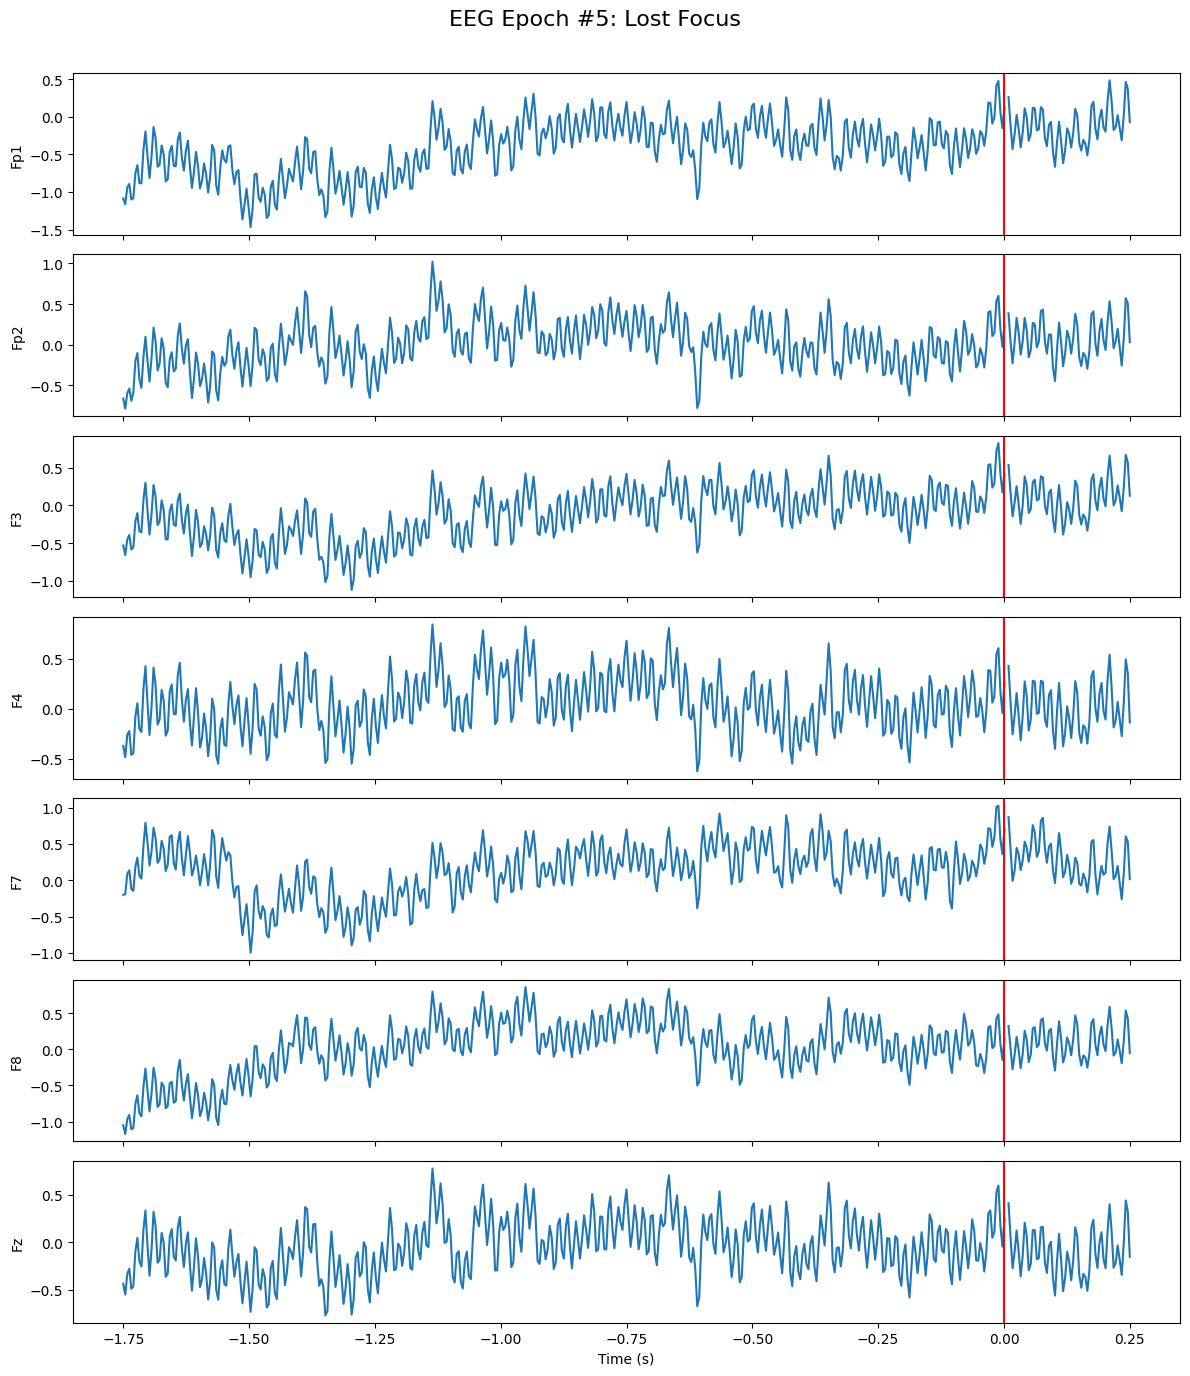

In [228]:
labels = [
'Fp1',
'Fp2',
'F3',
'F4',
'F7',
'F8',
'Fz'
]
# Visualize the first epoch
epoch_idx = 4
times = np.linspace(-pre_window, post_window, epochs.shape[2])  # Time axis in seconds
n_channels = epochs.shape[1]

fig, axes = plt.subplots(n_channels, 1, figsize=(12, 2 * n_channels), sharex=True)

for ch in range(n_channels):
    axes[ch].plot(times, epochs[epoch_idx, ch, :])
    axes[ch].set_ylabel(f'{labels[ch]}')
    axes[ch].axvline(x=0, color='red')

axes[-1].set_xlabel('Time (s)')
fig.suptitle(f'EEG Epoch #{epoch_idx+1}: {event_labels[epoch_idx]}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust for suptitle
plt.show()
# marker is in the middle
# period of time before and after event of interest

In [160]:
# EEG DATA IS NOW CLEAND AND FILTERED
# explain what each filter does

In [161]:
epoch_idx

3

In [213]:
## FOURIER TRANSFORM ##
from scipy.fft import fft, fftfreq, rfft, rfftfreq
# Parameters
epoch_idx = 4
sampling_rate = 250  # adjust to your actual sampling rate
T = 1.0 / sampling_rate
n_channels = epochs.shape[1]
n_samples = epochs.shape[2]

# EEG bands
bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}
band_colors = {
    "Delta": "blue",
    "Theta": "green",
    "Alpha": "orange",
    "Beta": "red",
    "Gamma": "purple"
}

# Frequency axis for rFFT
X = rfftfreq(n_samples, T)

In [214]:
ch = 0
signal = epochs[epoch_idx, ch, :]
signal = np.nan_to_num(signal, nan=0.0, posinf=0.0, neginf=0.0)

fft_vals = rfft(signal)
power = 2.0 / n_samples * np.abs(fft_vals)

/Users/seemarida/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemarida/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

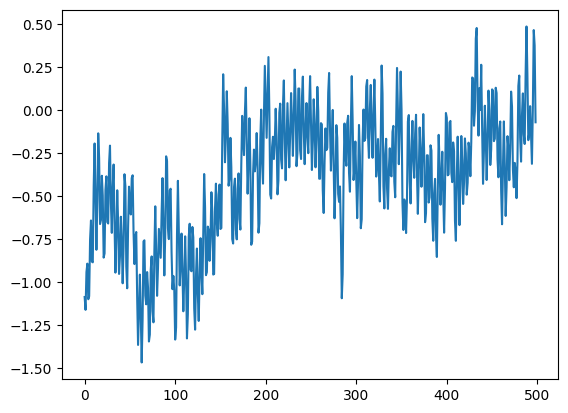

In [215]:
import seaborn as sns
sns.lineplot(signal)

/Users/seemarida/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemarida/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

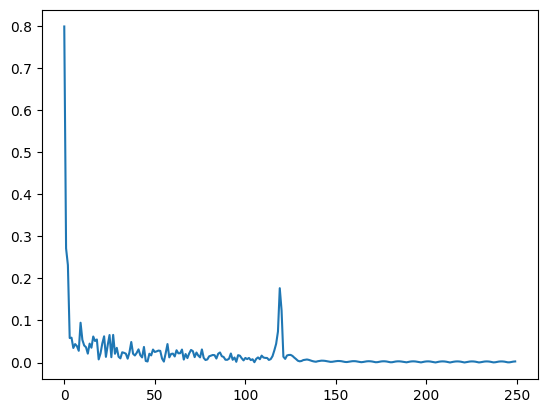

In [216]:
sns.lineplot(power)

In [217]:
fft_vals.shape

(250,)

In [218]:
band_powers = {}

for band, (low, high) in bands.items():
    idx = (X >= low) & (X < high)
    band_power = np.sum(power[idx])
    band_powers[band] = band_power

band_powers

{'Delta': 0.7373229643478325,
 'Theta': 0.354441452452398,
 'Alpha': 0.4247288498461475,
 'Beta': 0.7600843790833273,
 'Gamma': 0.6393885694837388}

In [219]:
total_power = np.sum(power)
for band in band_powers:
    band_powers[band] = band_powers[band] / total_power * 100  # in %

band_powers

{'Delta': 15.68772093193716,
 'Theta': 7.541306675158137,
 'Alpha': 9.036783052081526,
 'Beta': 16.172006298936896,
 'Gamma': 13.604010630543023}

In [220]:
# Initialize a list to collect data for the DataFrame
data = []

# FFT frequency bins (assuming a known sampling rate)
X = rfftfreq(n_samples, 1/sampling_rate)

for ch in range(n_channels):
    signal = epochs[epoch_idx, ch, :]
    signal = np.nan_to_num(signal, nan=0.0, posinf=0.0, neginf=0.0)
    
    fft_vals = rfft(signal)
    power = 2.0 / n_samples * np.abs(fft_vals)

    band_powers = {}

    for band, (low, high) in bands.items():
        idx = (X >= low) & (X < high)
        band_power = np.sum(power[idx])
        band_powers[band] = band_power

    total_power = np.sum(power)
    
    for band, raw_power in band_powers.items():
        power_percent = raw_power / total_power * 100
        data.append({'channel': ch, 'band': band, 'power_percent': power_percent})

# Create DataFrame
df = pd.DataFrame(data)

In [221]:
palette = sns.color_palette('Paired')
reordered_palette = [palette[1],palette[2],palette[10],palette[7],palette[4]]
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

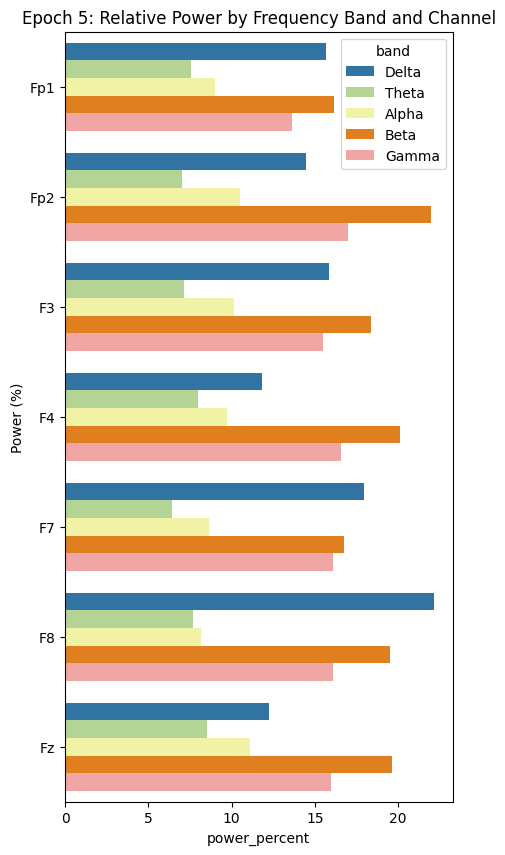

In [232]:
positions = range(len(labels))
plt.figure(figsize=(5, 10))
sns.barplot(data=df, x='power_percent', y='channel', hue='band', orient='h', palette=reordered_palette)
plt.title(f'Epoch {epoch_idx+1}: Relative Power by Frequency Band and Channel')
plt.ylabel('Power (%)')
plt.yticks(ticks=positions, labels=labels)
plt.show()

In [ ]:
# FFT SUBPLOTS + band powers
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 2 * n_channels), sharex=True)

for ch in range(n_channels):
    signal = epochs[epoch_idx, ch, :]
    signal = np.nan_to_num(signal, nan=0.0, posinf=0.0, neginf=0.0)
    
    fft_vals = rfft(signal)
    power = 2.0 / n_samples * np.abs(fft_vals)

    band_powers = {}

    for band, (low, high) in bands.items():
        idx = (X >= low) & (X < high)
        band_power = np.sum(power[idx])
        band_powers[band] = band_power

    total_power = np.sum(power)
    for band in band_powers:
        band_powers[band] = band_powers[band] / total_power * 100  # in %

axes[-1].set_xlabel('Frequency (Hz)')
fig.suptitle(f'FFT Power Spectrum for Epoch #{epoch_idx+1}', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## ADD IN EVENT MARKER

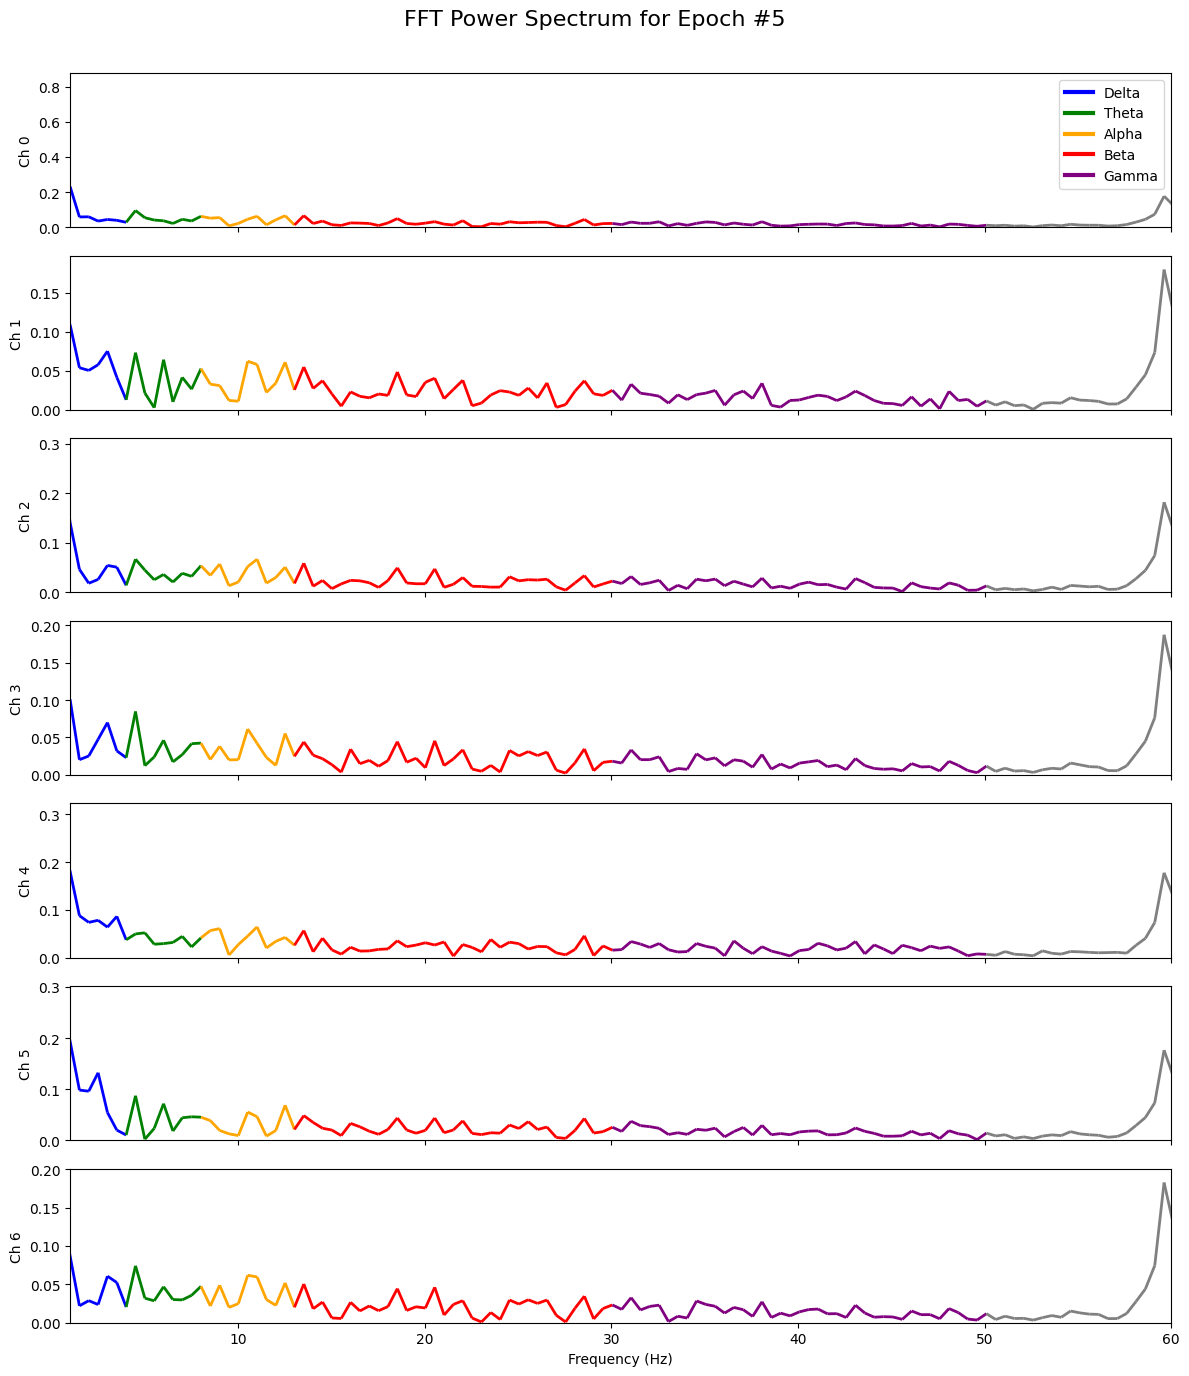

In [71]:
# FFT SUBPLOTS + line collection
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 2 * n_channels), sharex=True)

for ch in range(n_channels):
    signal = epochs[epoch_idx, ch, :]
    signal = np.nan_to_num(signal, nan=0.0, posinf=0.0, neginf=0.0)
    
    fft_vals = rfft(signal)
    power = 2.0 / n_samples * np.abs(fft_vals)

    # Create segments for LineCollection
    points = np.array([X, power]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    colors = []
    for i in range(len(X) - 1):
        freq = (X[i] + X[i+1]) / 2
        color = "gray"
        for band, (low, high) in bands.items():
            if low <= freq < high:
                color = band_colors[band]
                break
        colors.append(color)

    lc = LineCollection(segments, colors=colors, linewidth=2)
    axes[ch].add_collection(lc)
    axes[ch].set_xlim(1, 60)
    axes[ch].set_ylim(0, np.max(power) * 1.1)
    axes[ch].set_ylabel(f'Ch {ch}')

axes[-1].set_xlabel('Frequency (Hz)')
fig.suptitle(f'FFT Power Spectrum for Epoch #{epoch_idx+1}', fontsize=16)

legend_lines = [Line2D([0], [0], color=clr, lw=3, label=band) for band, clr in band_colors.items()]
axes[0].legend(handles=legend_lines, loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## ADD IN EVENT MARKER

In [ ]:
## CHOOSE A FEW GOOD WINDOWS